In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## importing datasets

df1 = pd.read_csv('data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)

In [5]:
df1.index.freq = 'D'

In [6]:
df2 = pd.read_csv('data/TradeInventories.csv',index_col='Date',parse_dates=True)

In [7]:
df2.index.freq = 'MS'

In [8]:
## importing the augmented dickey fuller test
from statsmodels.tsa.stattools import adfuller

## ARMA

<AxesSubplot:xlabel='Date'>

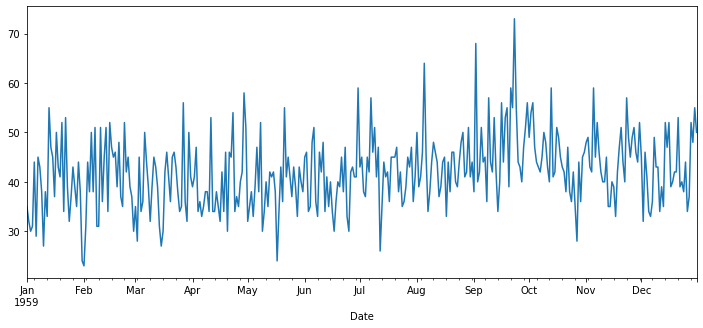

In [9]:
df1['Births'].plot(figsize=(12,5))

In [11]:
adfuller(df1['Births'])[1] > 0.05

False

**Since the null hypothesis is false, df1 is stationary**

In [16]:
## determining the variables for the ARMA model
from pmdarima import auto_arima

auto_arima(df1['Births'],
          seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2462.992, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [17]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [19]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

fitted_arma_model = ARMA(train['Births'],order=(1,1,1)).fit()

In [20]:
## evaluating the model on the test set
start = len(train)
end = len(train) + len(test) - 1

predictions = fitted_arma_model.predict(start=start,end=end)

In [21]:
predictions.rename('ARMA(1,1,1) Predictions',inplace=True)

1959-04-01    40.111449
1959-04-02    39.929452
1959-04-03    39.840659
1959-04-04    39.797340
1959-04-05    39.776205
                ...    
1959-12-27    39.756071
1959-12-28    39.756071
1959-12-29    39.756071
1959-12-30    39.756071
1959-12-31    39.756071
Freq: D, Name: ARMA(1,1,1) Predictions, Length: 275, dtype: float64

<AxesSubplot:xlabel='Date'>

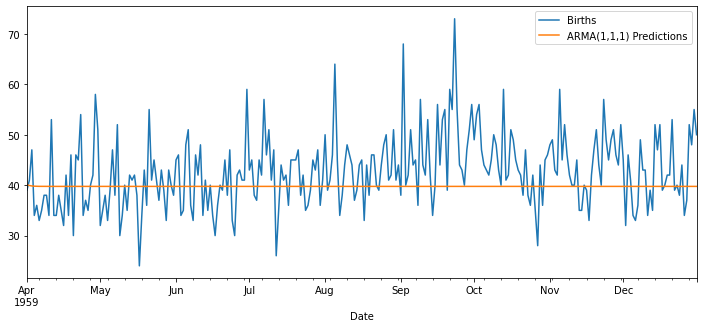

In [22]:
## plotting the predictions with the test set
test['Births'].plot(figsize=(12,5),legend=True)
predictions.plot(legend=True)

In [23]:
## evaluating quantitatively
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Births'],predictions))

In [26]:
## checking the average of the test set
test_mean = np.round(test['Births'].mean(),3)

In [29]:
print(f"The average of the test set is {test_mean}")
print(f"The rmse of the predictions is {np.round(test['Births'].mean(),4)}")

The average of the test set is 42.705
The rmse of the predictions is 42.7055


**Here we are appriximately getting average values as a predictions**

 ## ARIMA Model

In [58]:
df2.shape

(264, 1)

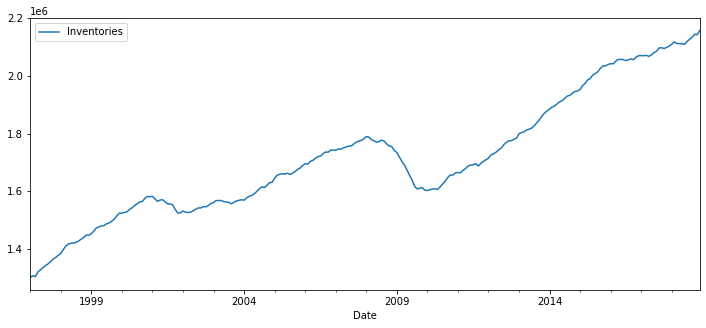

In [31]:
df2.plot(figsize=(12,5));

In [33]:
## let's run ETS decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2['Inventories'],model='add')

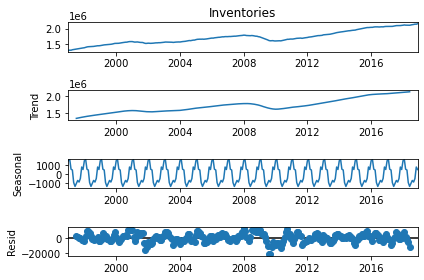

In [34]:
result.plot();

In [38]:
auto_arima(df2['Inventories'],seasonal=False,trace=True,
          start_P=0,max_p=5,
          start_d=0,max_d=5,
          start_q=0,max_q=5,
          m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5421.178, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.378 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [37]:
adfuller(df2['Inventories'])[1] > 0.05

True

The data df2 is non-stationary

In [49]:
train = df2.iloc[:252]
train = train.astype('float64')

test = df2.iloc[252:]
test = test.astype('float64')

In [50]:
fitted_arima_model = ARIMA(train['Inventories'],order=(0,1,0)).fit()

In [51]:
## making predictions for the test data
start = len(train)
end = len(train) + len(test) - 1

arima_predictions = fitted_arima_model.predict(start=start,end=end,dynamic=False,
                                              typ='levels')

## IMP: Here it is very important to put typ='levels'. This will give us the prediction values in its original format but not in differenced format

<AxesSubplot:xlabel='Date'>

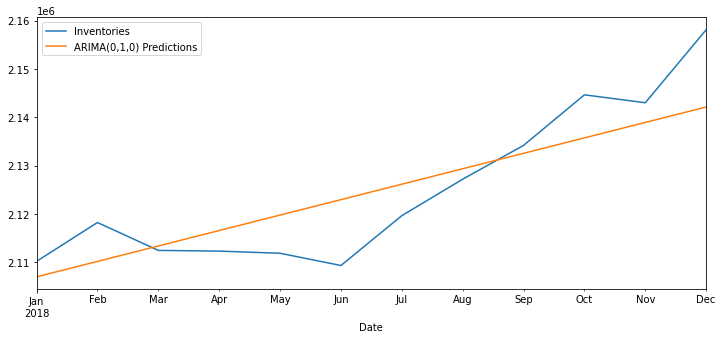

In [52]:
## plotting the predictions with the test set
test['Inventories'].plot(figsize=(12,5),legend=True)

arima_predictions.rename('ARIMA(0,1,0) Predictions',inplace=True)
arima_predictions.plot(legend=True)

In [53]:
## evaluating the model using the quantitative method
rmse = np.sqrt(mean_squared_error(test['Inventories'],arima_predictions))
test_mean = test['Inventories'].mean()

In [56]:
print(f"The average of the test data is {np.round(test_mean,3)}")
print(f"The rmse of the ARIMA(0,1,0) model predictions is {np.round(rmse,3)}")
print(f"So, rmse is {np.round((rmse/test_mean)*100,5)}% of the test set mean.")

The average of the test data is 2125075.667
The rmse of the ARIMA(0,1,0) model predictions is 7875.695
So, rmse is 0.37061% of the test set mean.


In [66]:
## Retraining the model on the full data and forecasting the future
final_model = ARIMA(df2['Inventories'],order=(1,1,1)).fit()

In [67]:
forecasted_values = final_model.predict(len(df2),len(df2)+11,typ='levels')

<AxesSubplot:xlabel='Date'>

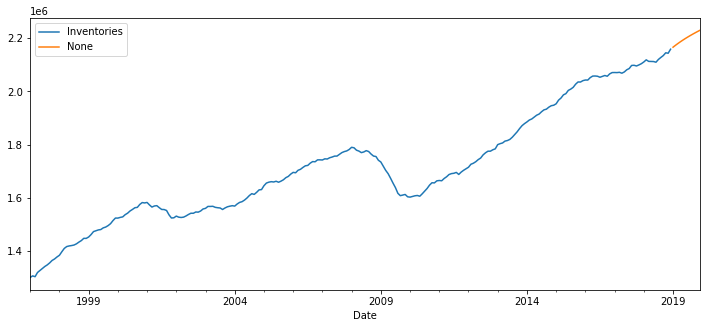

In [68]:
## plotting the forecasted value with the train data
df2['Inventories'].plot(figsize=(12,5),legend=True)
forecasted_values.plot(legend=True)